# Practical 1 
## Marta Perxés Perich

### Master of Multidisciplinary Research on Experimental Sciences. 

# Exercise 1: Paired t-test. To be submited

To investigate the effects of lighting conditions on the orb-spinning spider webs, researchers measured the
horizontal (width) and vertical (height) dimensions of the webs made by 17 spiders under light and dim
conditions. Accepting that the webs of individual spiders vary considerably, they employed a paired design in
which each individual spider acts as its own control. A paired t-test performs a one sample t-test on the
differences between dimensions under light and dim conditions.

You can find the data in the spider_web.csv file. Note the format of this data set. Rather than organizing the
data into the usual long format in which variables are represented in columns and rows represent individual
replicates, these data have been organized in wide format. Wide format is often used for data containing
repeated measures from individual or other sampling units. Even though this is not necessary (as paired
t-tests can be performed on long format data), traditionally it did allow more compact data management as
well as making it easier to calculate the differences between repeated measurements on each individual.

Perform two separate paired t-tests to test the following null hypotheses:

* No effect of lighting on web width
* No effect of lighting on web height

In [1]:
# loading required functions and modules #
import pandas as pd # Read data and work with data frames
import matplotlib.pyplot as plt # Boxplot and histogram
import statsmodels.api as sm # QQ plot
import scipy.stats as stats # Basic statistics
import numpy as np # Scientific computing

In [2]:
sw=pd.read_csv('spider_web.txt', sep=" ")
sw.head()

,PAIR,VERTDIM,HORIZDIM,VERTLIGH,HORIZLIG
0,K,300,295,80,60
1,M,240,260,120,140
2,N,250,280,170,160
3,O,220,250,90,120
4,P,160,160,150,180


In this exercise we're going to perform two separate paired t-tests. 


First of all we need to state the hypothesis. On the first case we have


    H0=> There is no effect of lighting on web width (HORIZDIM=HORIZLIG)
    HA=> There is an effect of lighting on web witdth (HORIZDIM=/=HORIZLIG)
    
We perform the t-test. There are two ways of doing this, we can either use the python function designed for this which will also give us the p-value or we can calculate it as we would do it by hand.

In [3]:
stats.ttest_ind(sw.HORIZDIM,sw.HORIZLIG) #Using the python function

Ttest_indResult(statistic=2.1405166251313874, pvalue=0.04003367486004684)

The p-value is smaller than 0.05. In that case, we could refuse the null hypothesis (H0) with a 95% confidence.

In [4]:
#We will get the same t-value if we use the formula for the t-value of a difference: t=(mean of the difference)/(sd/sqrt(n))
sw["HDiff"]=sw.HORIZDIM-sw.HORIZLIG
thorizontal=sw.HDiff.mean()/(sw.HDiff.std()/np.sqrt(17))
print(thorizontal)

2.148217249443686


We see that we get the same result, however, with this method we do not get the p-value. When using python the other one is easier. Therefore we will only use stats.ttest for comparing vertdim and vertligh.

The second paired t-test will state the effect of lighting on web height:

    H0=> There is no effect of lighting on web height (VERTDIM=VERTLIGH)
    HA=> There is an effect of lighting on web height (VERTDIM=/=VERTLIGH)

In [5]:
stats.ttest_ind(sw.VERTDIM,sw.VERTLIGH) #Using the python function

Ttest_indResult(statistic=0.8887858861631696, pvalue=0.38075080527784877)

In this case, the p-value is not smaller than 0.05 (which is the confidence interval we're using) and therefore we can't refuse the null hypothesis.

# Exercise 2: Sampling from a binomial distribution
Now, we will answer the same questions but sampling from a binomial distribution. The binomial distribution arises whenever we perform a series of independent trials each of which can result in either success or failure.

1. Sample from binomial distribution a thousand samples of sample size = 100 and plot the sampling distribution of the mean.

2. Calculate the mean of the population and the sampling distribution of the mean. Are they the similar?

3. Calculate the standard deviation of both distributions. Check if the CLT really estimates the sample standard deviation.

4. What happens when you change the number of times that you sample? Try sampling 10 times, 100 times, and so on

5. What happens when we increase the size of the sample that we take? Try sampling 3 values, 10, 50, 100, and so on.

Text(0.5, 1.0, 'Binomial distribution, n=20 p=0,4')

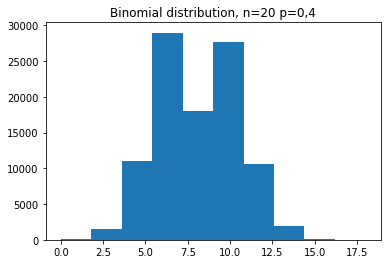

In [6]:
#we first generate a binomial distribution
binomial=np.random.binomial(20,0.4,100000)
plt.hist(binomial)
plt.title("Binomial distribution, n=20 p=0,4")

In [7]:
def doSampling(dat, numSamples, sizeSamples):
    # calculate and plot a sampling distribution of the mean
    # parameters given are:
        # dat = data to sample from (numeric vector),
        # numSamples = number of times you want to sample (number)
        # sizeSamples = size of the sample (number)
    for i in range(numSamples):
        # simple random sampling
        get_sample = np.random.choice(dat, size = sizeSamples, replace = True) #replace=true fa que pugui agafar valors que ja hagi agafat abans
        #random.choice, de les dades en tria sizesamples (en aquest cas 27)
        #calculate mean and return it
        yield np.mean(get_sample)

The mean of the distribution is  7.99983
The mean of the sampling distribution of the mean is  8.00991
The std of the distribution is  2.1934607293270605
The std of the sampling distribution of the mean is  0.2156786774347432


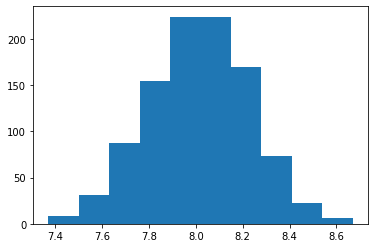

In [8]:
dat=binomial
numSamples=1000
sizeSamples=100
x=doSampling(dat, numSamples, sizeSamples)
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )

The mean of the population and the mean of the sampling distribution are very similar, with less than 0.003 units of difference. 

The central limit theorem (CLT) states that the standard deviation of the sample distribution is std/sqrt(n). 
In this case, std(dist)/sqrt(100)=0.21913  =~ std(sampledist) = 0.21726 . Therefore, the central limit theorem estimates the std of the sample distribution very well.

Now, we will see the effect of the number of samples we take. 

In [9]:
dat=binomial
sizeSamples=100
numSamples=[10,100,1000,100000]

for i in numSamples:
    x=doSampling(dat, i, sizeSamples)
    samplingdist=np.fromiter(x, float)
    print(samplingdist.mean())
    print(samplingdist.std())

8.049999999999999
0.1361616686149229
7.978500000000001
0.22778663261921228
7.987850000000001
0.2232869846184502
7.9984528
0.2186902608077461


As we can see, when changing the number of samples the mean and the standard deviation of the sampling distribution remain the same. The mean is close to the mean of the population and the standard deviation is std(dist)/sqrt(n).

However, when we change the size of the samples..

In [10]:
dat=binomial
sizeSamples=[3,10,30,100,1000,100000]
numSamples=100

for i in sizeSamples:
    x=doSampling(dat, numSamples, i)
    samplingdist=np.fromiter(x, float)
    print(samplingdist.mean())
    print(samplingdist.std())

7.996666666666667
1.3178222776822204
7.962999999999999
0.6859526222706639
8.007666666666667
0.45082282797371986
7.981600000000001
0.1939727815957693
7.996859999999999
0.07020356401209274
7.999762200000001
0.007072551955270423


In this case, we can see that while the mean is remaining the same, the standard deviation of the sampling distribution decreases, once again proving the central limit theorem and the std of each sample being std(dist)/sqrt(n), where n is the size of the samples but not the number of samples.

# Exercise 3: Sampling from an uniform distribution

Finally, we will do the same using an uniform distribution. For instance, let’s generate an uniform distribution of
numbers 0 to 9.

1\. Sample from uniform distribution a thousand samples of sample size = 100 and plot the sampling distribution of
the mean.

2\. Calculate the mean of the population and the sampling distribution of the mean. Are they the similar?

3\. Calculate the standard deviation of both distributions. Check if the CLT really estimates the sample standard
deviation.

4\. What happens when you change the number of times that you sample? Try sampling 10 times, 100 times, and so on.

5\. What happens when we increase the size of the sample that we take? Try sampling 3 values, 10, 50, 100, and so
on.


This exercise is very similar than the last one. We're going to do the same procedure. First, we create the uniform distribution.

Text(0.5, 1.0, 'Uniform distribution')

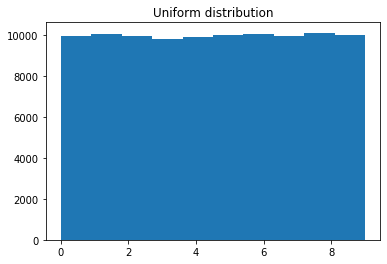

In [11]:
uniform=np.random.uniform(0,9,100000)
plt.hist(uniform)
plt.title("Uniform distribution")

The mean of the distribution is  4.510210407921589
The mean of the sampling distribution of the mean is  4.507037286853514
The std of the distribution is  2.6010154307482485
The std of the sampling distribution of the mean is  0.26232709697512674


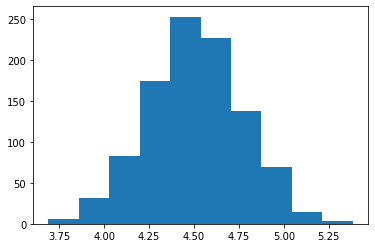

In [12]:
dat=uniform
numSamples=1000
sizeSamples=100
x=doSampling(dat, numSamples, sizeSamples)
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )

As we can see, when we sample from a uniform distribution a large amount of times, the mean distribution is normal, with the mean of the population (uniform distribution in this case) and the standard deviation being equal to std(uniform)/sqrt(n).

In [13]:
dat=uniform
sizeSamples=100
numSamples=[10,100,1000,100000]

for i in numSamples:
    x=doSampling(dat, i, sizeSamples)
    samplingdist=np.fromiter(x, float)
    print(samplingdist.mean())
    print(samplingdist.std())

4.558732604004829
0.3429510150217303
4.500793052256798
0.2342771948976813
4.514511498422047
0.2638301320047768
4.509528913639423
0.2600137233328699


In [14]:
dat=binomial
sizeSamples=[3,10,30,100,1000,100000]
numSamples=100

for i in sizeSamples:
    x=doSampling(dat, numSamples, i)
    samplingdist=np.fromiter(x, float)
    print(samplingdist.mean())
    print(samplingdist.std())

8.063333333333334
1.4186809209810203
7.978000000000001
0.6707577804244986
7.992333333333334
0.3855401694016102
7.9731999999999985
0.20757591382431628
8.01051
0.060335477954516936
7.999191200000001
0.00796584060598754


We see again that by changing the number of samples the mean and the standard deviation of the sampling distribution remain the same. However, when we change the size of the sample, the standard deviation decreases according to the sqrt(sizeSample). 